# Introduction

This lab demonstrates how to plot the classification probability of different classifiers using Python Scikit-learn. We will use a 3 class dataset, and we classify it with a Support Vector classifier, L1 and L2 penalized logistic regression with either a One-Vs-Rest or multinomial setting, and Gaussian process classification.

# Import necessary libraries

We start by importing the necessary libraries for the lab.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets

# Load the dataset

Next, we load the iris dataset from Scikit-learn.

In [4]:
iris = datasets.load_iris()
X = iris.data[:, 0:2] # we only take the first two features for visualization
y = iris.target
n_features = X.shape[1]

# Define the classifiers

We define different classifiers for the dataset.

In [5]:
C = 10
kernel = 1.0 * RBF([1.0, 1.0])

# Create different classifiers.
classifiers = {
    'L1 logistic': LogisticRegression(
        C=C, penalty='l1', solver='saga', multi_class='multinomial', max_iter=10_000
    ),
    'L2 logistic (Multinominal)': LogisticRegression(
        C=C, penalty='l2', solver='saga', multi_class='multinomial', max_iter=10_000
    ),
    'L2 logistic (OvR)': LogisticRegression(
        C=C, penalty='l2', solver='saga', multi_class='ovr', max_iter=10_000
    ),
    'Linear SVC': SVC(kernel='linear', C=C, probability=True, random_state=0),
    'GPC': GaussianProcessClassifier(kernel=kernel),
}

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy (train) for L1 logistic: 82.7% 
Accuracy (train) for L2 logistic (Multinominal): 82.7% 
Accuracy (train) for L2 logistic (OvR): 79.3% 
Accuracy (train) for Linear SVC: 82.0% 
Accuracy (train) for GPC: 82.7% 


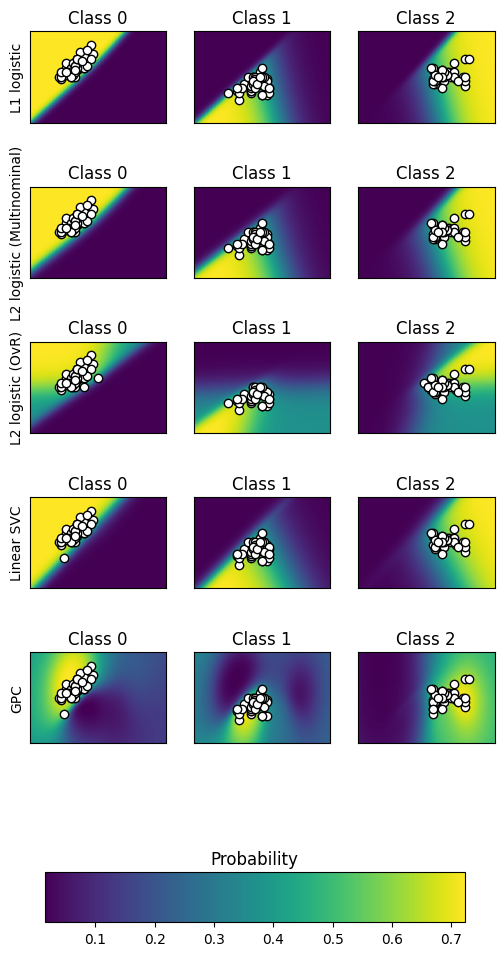

In [6]:
n_classifiers = len(classifiers)

plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=0.2, top=0.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X, y)

    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))

    # View probabilities:
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(
            probas[:, k].reshape((100, 100)), extent=(3, 9, 1, 5), origin="lower"
        )
        plt.xticks(())
        plt.yticks(())
        idx = y_pred == k
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker="o", c="w", edgecolor="k")

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation="horizontal")

plt.show()

# Summary

This lab demonstrated how to plot the classification probability for different classifiers using Python Scikit-learn. We loaded the iris dataset, defined different classifiers, and visualized the classification probability for each classifier.